In [6]:
from few.waveform import EMRIInspiral
import numpy as np
import matplotlib.pyplot as plt
from few.utils.constants import YRSID_SI, MTSUN_SI
from few.utils.utility import get_fundamental_frequencies
from scipy.interpolate import CubicSpline

plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Computer Modern"]
# plt.rcParams["font.size"] = 
plt.rcParams["axes.labelsize"]=14
plt.rcParams["xtick.labelsize"]=12
plt.rcParams["ytick.labelsize"]=12
plt.rcParams["legend.fontsize"]=10


In [7]:
traj = EMRIInspiral(func="pn5")
traj_res_23 = EMRIInspiral(func="pn5", orbital_resonances="default", which_resonances=[(2,3), ])
traj_res_23_45 = EMRIInspiral(func="pn5", orbital_resonances="default", which_resonances=[(2,3), (4,5)])

In [43]:
M = 1e6
mu = 3e1#1e1
a = 0.9
p0 = 8.8#6.8
e0 = 0.3
Y0 = 0.8
dt=1e6
T=4.


trh = traj(M, mu, a, p0, e0, Y0, T=T,dt=dt,err=1e-17)

In [45]:
trh_res = traj_res_23(M, mu, a, p0, e0, Y0, T=T,dt=dt,err=1e-17)
# trh_res_both = traj_res_23_45(M, mu, a, p0, e0, Y0, T=T,dt=dt,err=1e-17)


# len(trh_res_both[0]), len(trh_res[0]), len(trh[0])

The (2, 3) resonance occured at time 1.55020e+07, p 6.14


In [46]:
nores_freq_traj = np.array(get_fundamental_frequencies(a, trh[1], trh[2], trh[3]))  / (M*MTSUN_SI)
res_freq_traj = np.array(get_fundamental_frequencies(a, trh_res[1], trh_res[2], trh_res[3])) / (M*MTSUN_SI)

nores_freq_traj.shape

(3, 7236)

In [47]:
from seaborn import color_palette
import matplotlib.patches as mpatches
cpal = color_palette("colorblind")

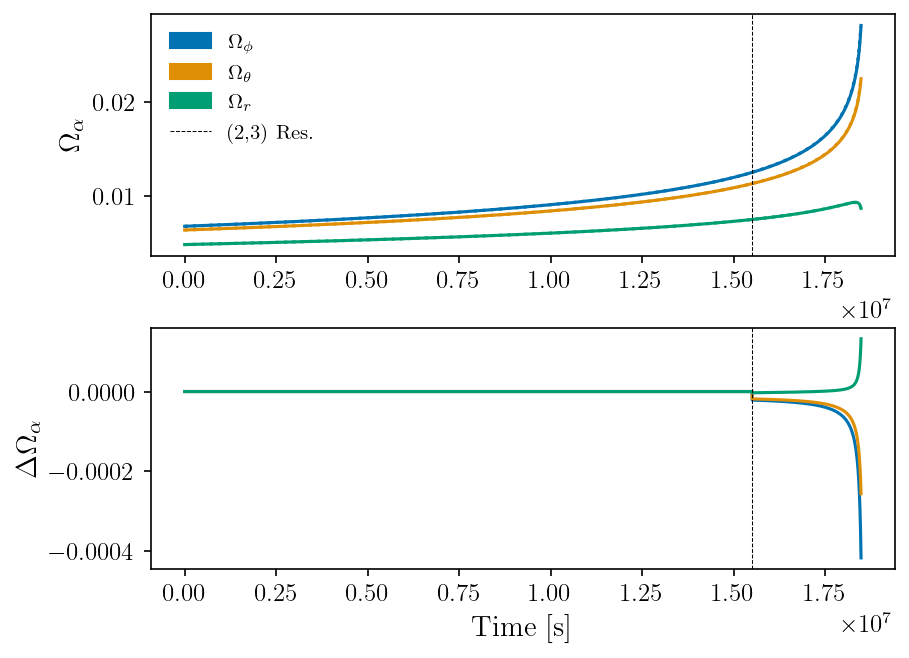

In [76]:
plt.figure(dpi=150)
plt.subplot(211)

frlab = r"$\Omega_{}$"
labs = [frlab.format(sym) for sym in [r"\phi", r"\theta", r"r"]]
for i in range(3):
    plt.plot(trh[0], nores_freq_traj[i], c=cpal[i])
    plt.plot(trh_res[0], res_freq_traj[i], c=cpal[i],ls=':')
    plt.plot([], [], c=cpal[i], lw=10, label=labs[i])

# l1 = plt.plot([], [], c='k', label="Adiabatic")[0]
# l2 = plt.plot([], [], c='k', ls=':', label="Adiabatic + Res")[0]

# plt.axvline(traj_res_23.inspiral_generator.resonance_crossing_times[(2,3)]/YRSID_SI, lw=1., c='green', label="(2,3)")
# plt.axvline(traj_res_23_45.inspiral_generator.resonance_crossing_times[(4,5)]/YRSID_SI, ls='--', lw=1., c='magenta', label="(4,5)")
l1 = plt.axvline(traj_res_23.inspiral_generator.resonance_crossing_times[(2,3)], ls='--', lw=0.5, c='k', label="(2,3) Res.")
patches = [mpatches.Patch(color=cpal[i], label=labs[i]) for i in range(3)]

plt.legend(handles=[*patches,l1], frameon=False)
plt.ylabel(r"$\Omega_\alpha$")

plt.subplot(212)

resampled_nores_traj = CubicSpline(trh[0], nores_freq_traj, axis=1)(trh_res[0])
resampled_nores_phase = CubicSpline(trh[0], trh[4])
for i in range(3):
    plt.plot(trh_res[0], resampled_nores_traj[i] - res_freq_traj[i], c=cpal[i])
    plt.plot([], [], c=cpal[i], lw=10, label=labs[i])

l1 = plt.axvline(traj_res_23.inspiral_generator.resonance_crossing_times[(2,3)], ls='--', lw=0.5, c='k', label="(2,3)")
ctime = traj_res_23.inspiral_generator.resonance_crossing_times[(2,3)]
# plt.xlim(ctime - 1e4, ctime+1e4)

plt.xlabel("Time [s]")
plt.ylabel(r"$\Delta \Omega_\alpha$")
# plt.ylim(1e-4, None)
plt.subplots_adjust(hspace=0.3)
# plt.tight_layout()
plt.savefig("resonance.png",dpi=200)

In [69]:
from few.waveform import Pn5TrajPn5AdiabaticWaveform, Pn5AAKWaveform

wf = Pn5TrajPn5AdiabaticWaveform(inspiral_kwargs=dict(err=1e-14))
wf_res = Pn5TrajPn5AdiabaticWaveform(inspiral_kwargs=dict(orbital_resonances=True,err=1e-14))
wf_aak = Pn5AAKWaveform()
wf_aak_res = Pn5AAKWaveform(inspiral_kwargs=dict(orbital_resonances=True))

In [70]:
wave_out = wf(M, mu, 0.9, 9.6, 0.21, np.cos(80 * np.pi/180), np.pi/4, 0., T=1.3e-3,dt=1.,eps=1e-5)
# wave_out_fast = wf(M, mu, 0.9, 9.6, 0.21, np.cos(80 * np.pi/180), np.pi/4, 0., T=1.3e-3,dt=1.,eps=1e-2, dist=1.)
# wave_out_aak = wf_aak(M, mu, 0.9, 9.6, 0.21, np.cos(80*np.pi/180), 1., 0., 0., np.pi/4, 0.,T=1.3e-3, dt=1., Phi_theta0=np.pi)

In [10]:
# %timeit wf(M, mu, 0.9, 9.6, 0.21, np.cos(80 * np.pi/180), np.pi/4, 0., T=1.3e-3,dt=1.,eps=1e-2, dist=1.)

In [11]:
# %timeit wave_out_aak = wf_aak(M, mu, 0.9, 9.6, 0.21, np.cos(80*np.pi/180), 1., 0., 0., np.pi/4, np.pi,T=1.3e-3, dt=1.)


(0.0, 39000.0)

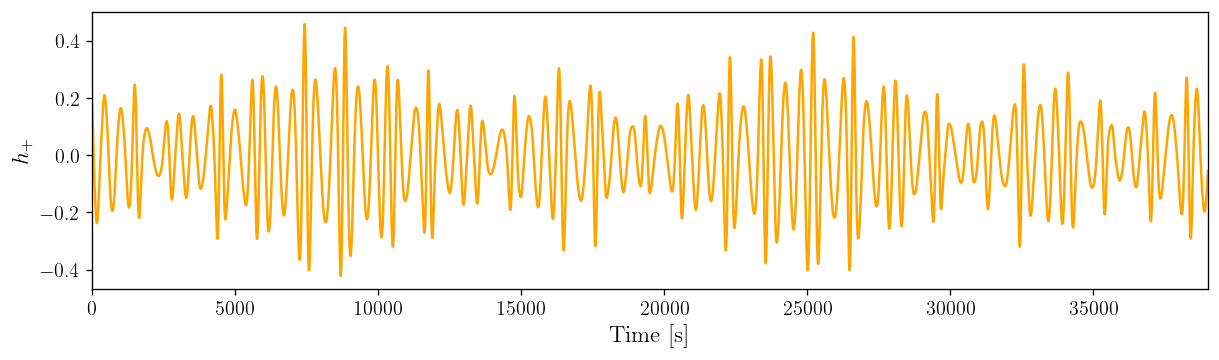

In [71]:
plt.figure(dpi=120,figsize=(12,3))
plt.plot(wave_out.real,c='orange')
# plt.plot(wave_out_fast.real,c='green', ls='--')
# plt.plot(-wave_out_aak.real,c='red', )
plt.xlabel("Time [s]")
plt.ylabel(r"$h_+$")
plt.xlim(0, 39000)
# get_mismatch(wave_out.real, -wave_out_aak.real)
# np.savetxt("pn5_few_wave.txt", np.vstack((np.arange(len(wave_out)), wave_out.real, wave_out.imag)).T)

In [72]:
from few.utils.utility import get_mismatch
# 1/0

The (2, 3) resonance occured at time 7.20182e+03, p 9.52
[]


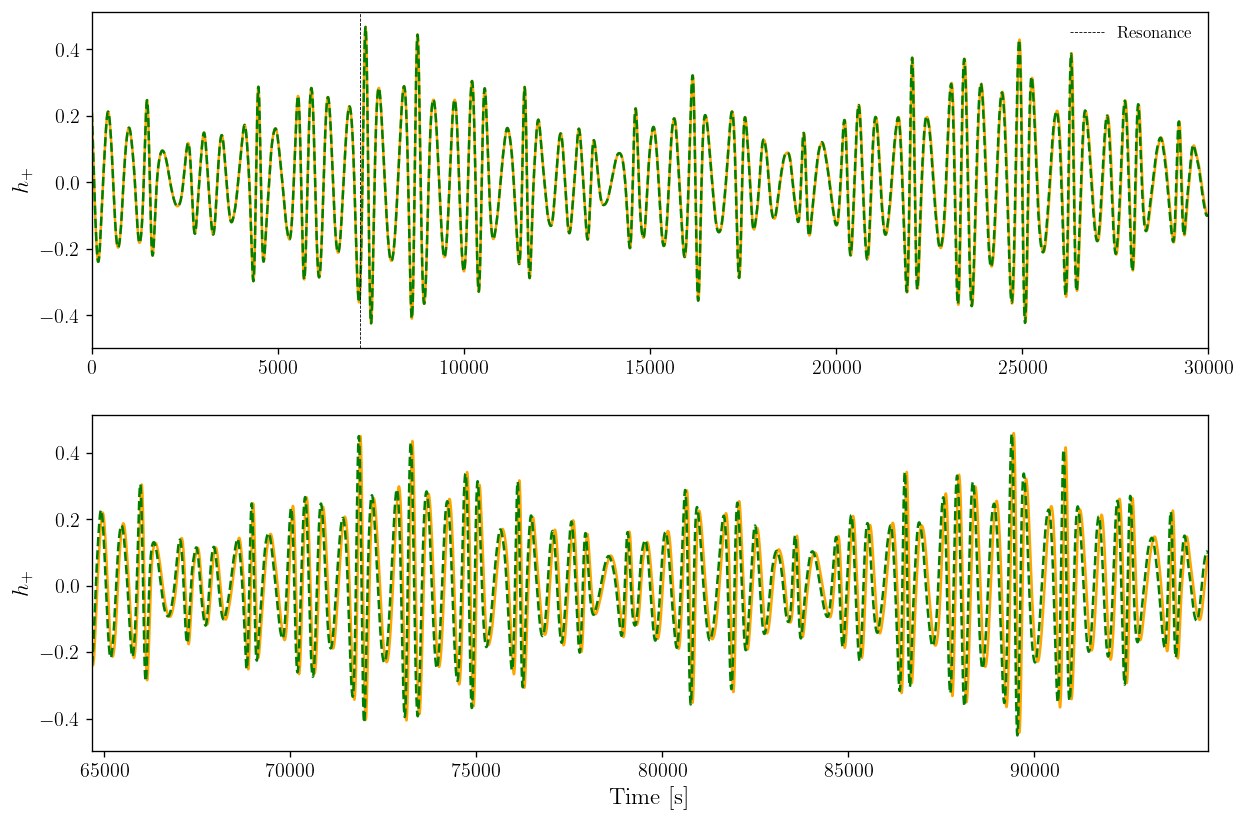

In [75]:
wave_out = wf(M, mu, 0.9, 9.524, 0.21, np.cos(80 * np.pi/180), np.pi/4, 0., T=3e-3,dt=1.)
wave_out_res = wf_res(M, mu, 0.9, 9.524, 0.21, np.cos(80 * np.pi/180), np.pi/4, 0., T=3.e-3,dt=1.)

# wave_out = wf_aak(M, mu, 0.9, 9.524, 0.21, np.cos(80 * np.pi/180), 1., np.pi/4, 0., 0., 0., T=1.3e-3,dt=1.)
# wave_out_res = wf_aak_res(M, mu, 0.9, 9.524, 0.21, np.cos(80 * np.pi/180), 1., np.pi/4, 0., 0., 0., T=1.3e-3,dt=1.)

print(wf_res.inspiral_generator.inspiral_generator.resonances_remaining)#
# print(wf_res.inspiral_generator.inspiral_generator.resonance_crossing_times[0])
plt.figure(dpi=120,figsize=(12,8))
plt.subplot(211)
plt.plot(wave_out.real,c='orange')
plt.plot(wave_out_res.real,c='green',ls='--')
plt.ylabel(r"$h_+$")
plt.axvline(wf_res.inspiral_generator.inspiral_generator.resonance_crossing_times[(2,3)], c='k', ls='--',lw=0.5, label="Resonance")
plt.xlim(0, 30000)
plt.legend(frameon=False)

plt.subplot(212)
plt.plot(wave_out.real,c='orange')
plt.plot(wave_out_res.real,c='green',ls='--')
plt.xlim(len(wave_out)-30000, len(wave_out))
plt.xlabel("Time [s]")
plt.ylabel(r"$h_+$")
# plt.xlim(0, 39000)
get_mismatch(wave_out, wave_out_res)
plt.savefig("resonance_waveform.png",dpi=200)

In [15]:
%timeit wave_out = wf(M, mu, 0.9, 9.524, 0.21, np.cos(80 * np.pi/180), np.pi/4, 0., T=3e-3,dt=1.)

1.51 s ± 127 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
%timeit wave_out_res = wf_res(M, mu, 0.9, 9.524, 0.21, np.cos(80 * np.pi/180), np.pi/4, 0., T=3.e-3,dt=1.)

The (2, 3) resonance occured at time 7.20182e+03, p 9.52
The (2, 3) resonance occured at time 7.20182e+03, p 9.52
The (2, 3) resonance occured at time 7.20182e+03, p 9.52
The (2, 3) resonance occured at time 7.20182e+03, p 9.52
The (2, 3) resonance occured at time 7.20182e+03, p 9.52
The (2, 3) resonance occured at time 7.20182e+03, p 9.52
The (2, 3) resonance occured at time 7.20182e+03, p 9.52
The (2, 3) resonance occured at time 7.20182e+03, p 9.52
1.49 s ± 53.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
